<a href="https://colab.research.google.com/github/Mr0Ctrl/NYC_df/blob/main/NewYorkCityAirbnb(AhmetAtakanDemir).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
nyc_df = pd.read_csv('/content/drive/MyDrive/Kaggle/AB_NYC_2019.csv')
nyc_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
nyc_df.drop(['id','host_id','host_name'], axis=1,inplace=True)
nyc_df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
nyc_df.isnull().sum()

name                                 16
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
nyc_df.fillna({"reviews_per_month":0, "last_review":0}, inplace=True)
nyc_df.isnull().sum()

name                              16
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [7]:
print(nyc_df['neighbourhood_group'].unique())
print(nyc_df['room_type'].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
['Private room' 'Entire home/apt' 'Shared room']


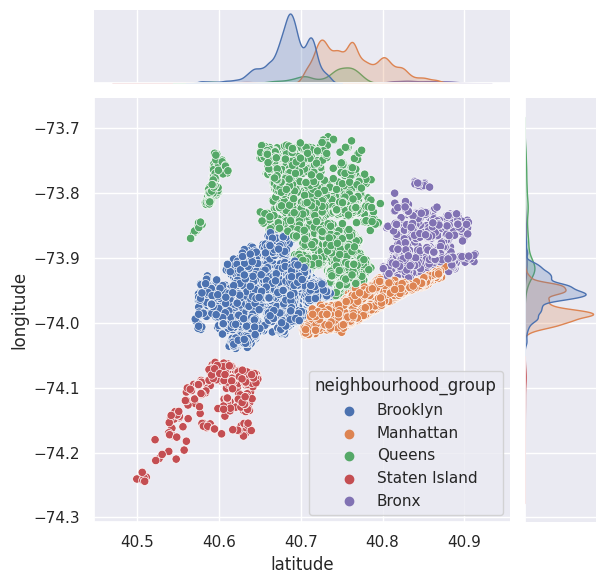

In [8]:
sns.jointplot(x='latitude',y='longitude', data = nyc_df , hue = 'neighbourhood_group' )

<Axes: title={'center': 'Neighbourhood frequency'}>

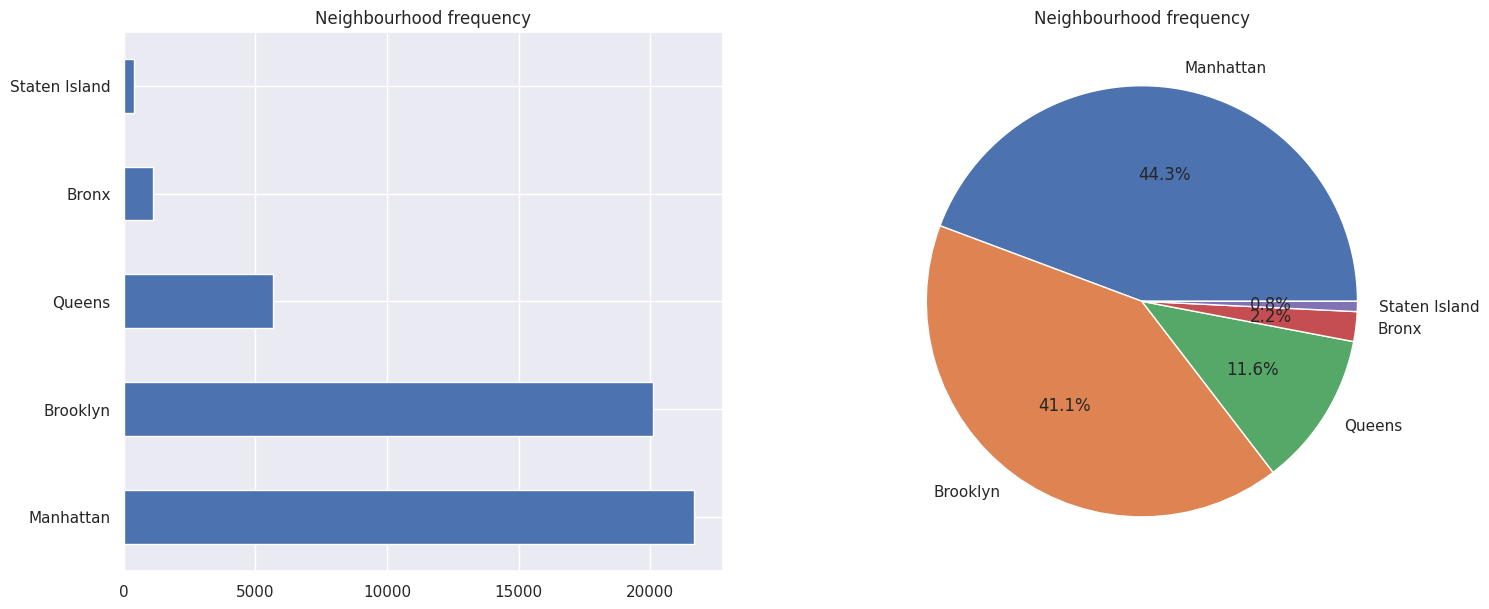

In [9]:
figure, axes = plt.subplots(1, 2, figsize=(17,7))
nyc_df['neighbourhood_group'].value_counts().plot.pie(autopct="%0.1f%%", ylabel = '', ax =axes[1], title = 'Neighbourhood frequency')
nyc_df['neighbourhood_group'].value_counts().plot.barh(ax= axes[0], title = 'Neighbourhood frequency')

Text(0, 0.5, 'frequency')

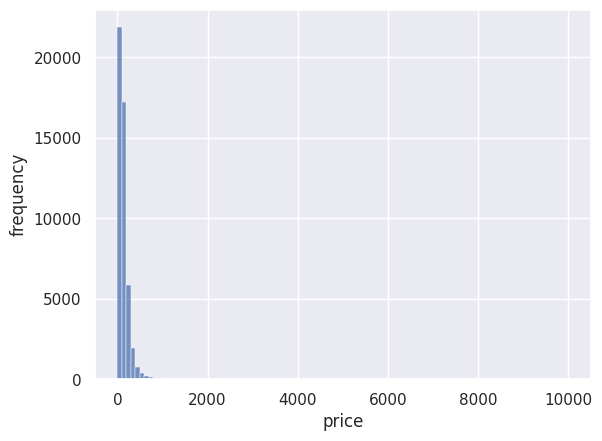

In [10]:
sns.histplot(nyc_df['price'], bins=100)
plt.ylabel("frequency")

<Axes: title={'center': 'Average Price of Neighbourhood'}>

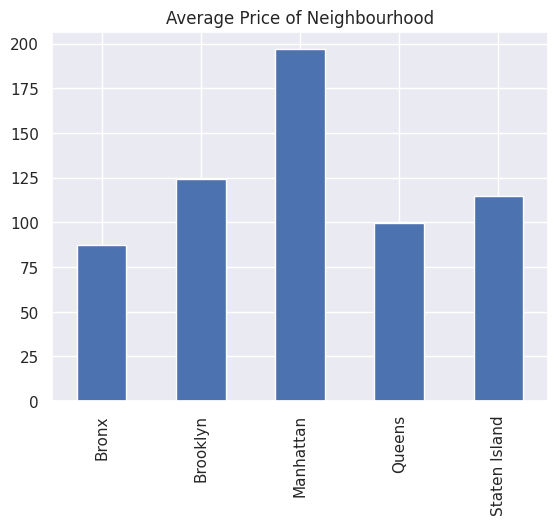

In [11]:
nyc_df.groupby('neighbourhood_group')['price'].mean().plot.bar( title = 'Average Price of Neighbourhood', ylabel = '',xlabel = '')

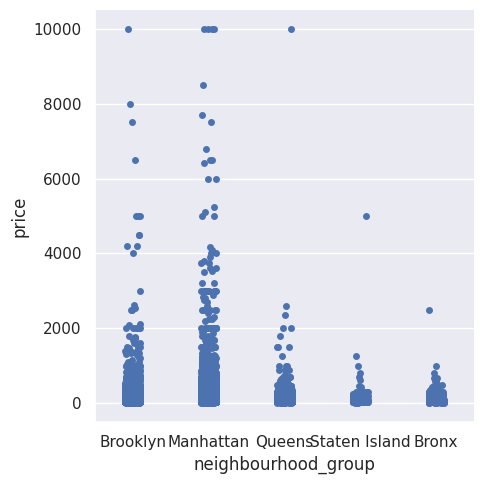

In [12]:
sns.catplot(x="neighbourhood_group", y="price", data=nyc_df)

Text(0.5, 1.0, 'Neighbourhood - Price - Room type')

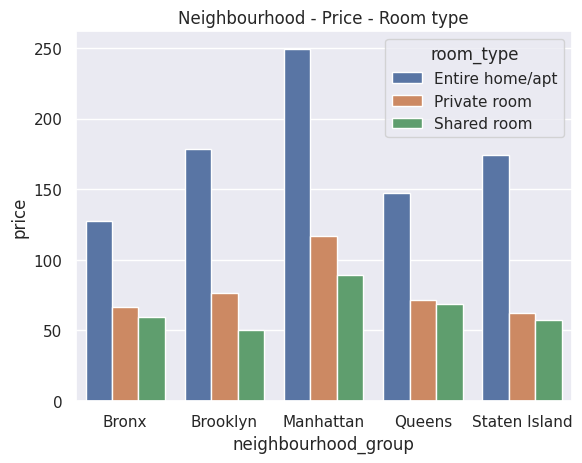

In [13]:
npr_df = nyc_df.groupby(by=['neighbourhood_group', 'room_type']).agg({'price':'mean'})
npr_df.reset_index(inplace = True)
sns.barplot(x = npr_df['neighbourhood_group'], y = npr_df['price'], hue=npr_df['room_type'])
plt.title("Neighbourhood - Price - Room type")

<ipython-input-14-b67cfda0ba24>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(nyc_df.corr(), annot=True );


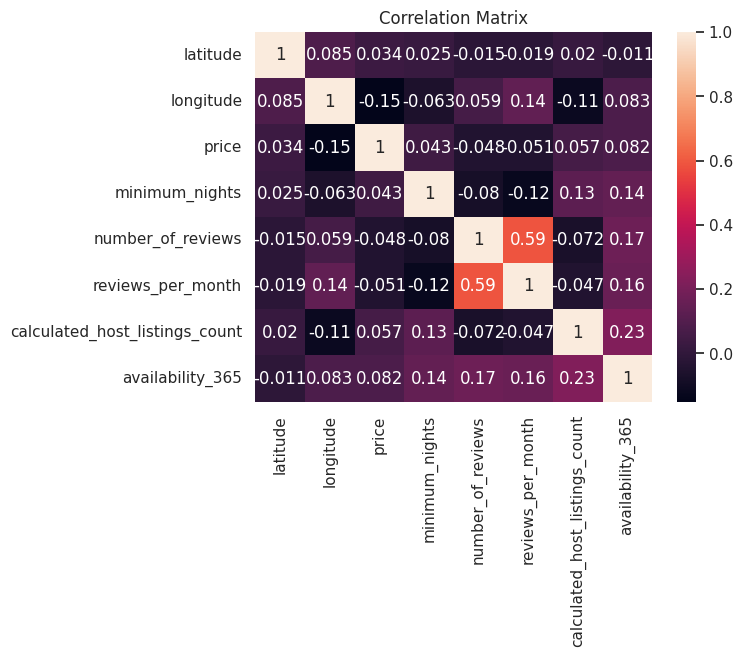

In [14]:
plt.title("Correlation Matrix")
sns.heatmap(nyc_df.corr(), annot=True );

<Axes: xlabel='number_of_reviews', ylabel='reviews_per_month'>

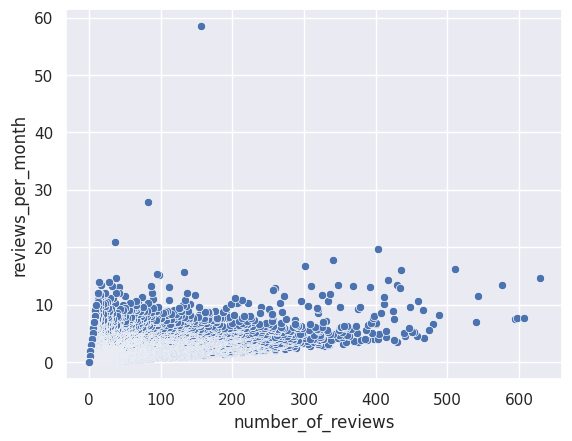

In [15]:
sns.scatterplot( x= nyc_df['number_of_reviews'], y=nyc_df['reviews_per_month'])

<Axes: title={'center': 'Bronx'}>

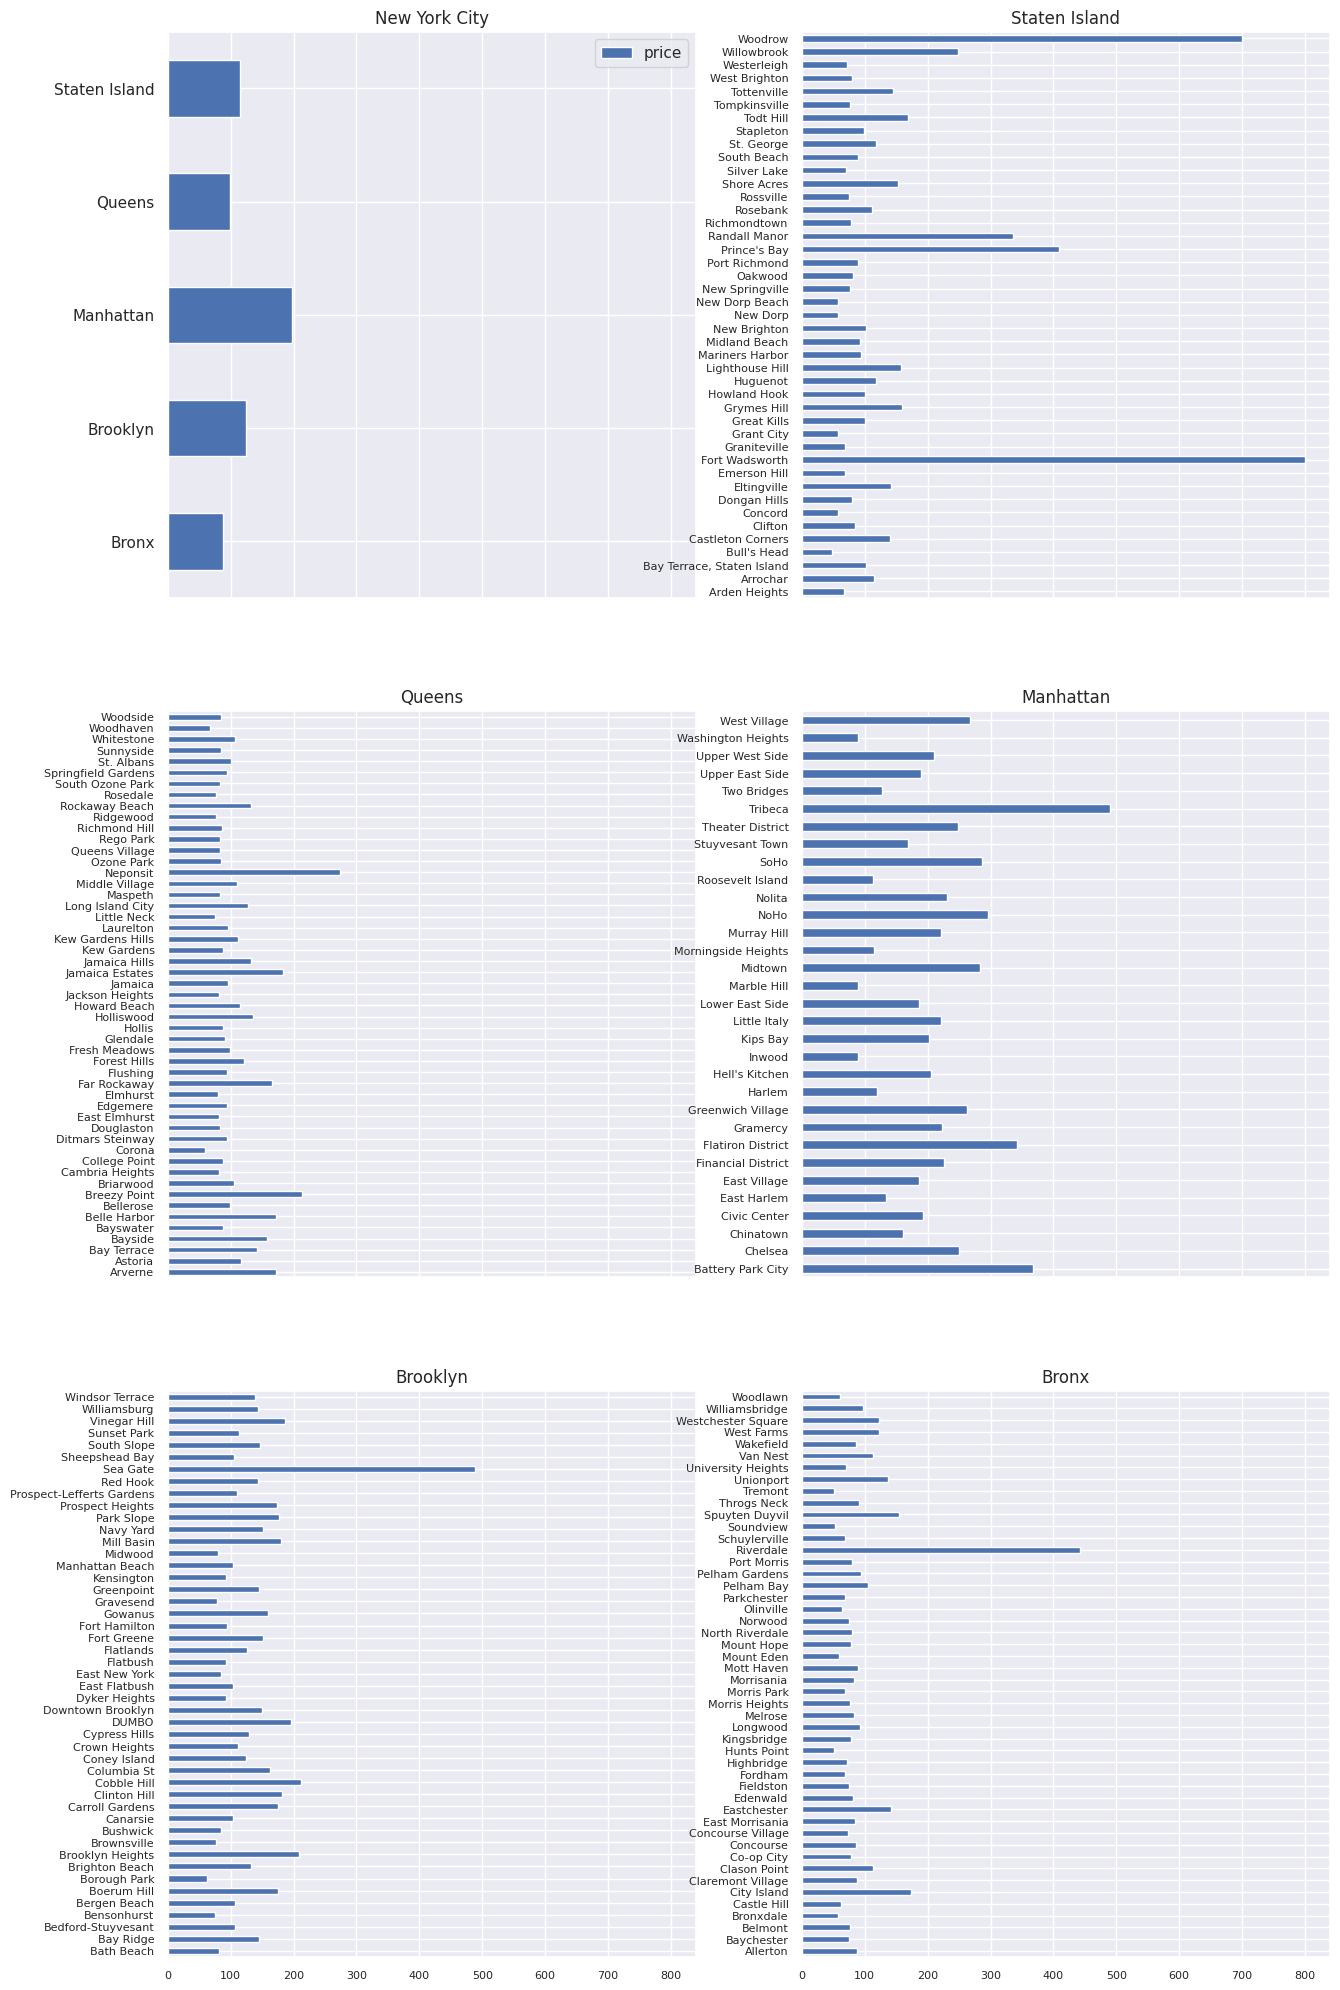

In [16]:
figure, axes = plt.subplots(3, 2, sharex=True, figsize=(15,25))

nyc_df.groupby('neighbourhood_group')['price'].mean().plot.barh(ax = axes[0,0], title = 'New York City', ylabel = '',legend = 'st' )
nyc_df[nyc_df.neighbourhood_group == 'Staten Island'].groupby('neighbourhood')['price'].mean().plot.barh(ax = axes[0,1], title = 'Staten Island', ylabel = '', fontsize = 8 )
nyc_df[nyc_df.neighbourhood_group == 'Queens'].groupby('neighbourhood')['price'].mean().plot.barh(ax = axes[1,0], title = 'Queens', ylabel = ''  , fontsize = 8)
nyc_df[nyc_df.neighbourhood_group == 'Manhattan'].groupby('neighbourhood')['price'].mean().plot.barh(ax = axes[1,1], title = 'Manhattan', ylabel = '', fontsize = 8 )
nyc_df[nyc_df.neighbourhood_group == 'Brooklyn'].groupby('neighbourhood')['price'].mean().plot.barh(ax = axes[2,0], title = 'Brooklyn', ylabel = '' , fontsize = 8)
nyc_df[nyc_df.neighbourhood_group == 'Bronx'].groupby('neighbourhood')['price'].mean().plot.barh(ax = axes[2,1], title = 'Bronx', ylabel = '' , fontsize = 8)



<Axes: title={'center': 'Bronx'}>

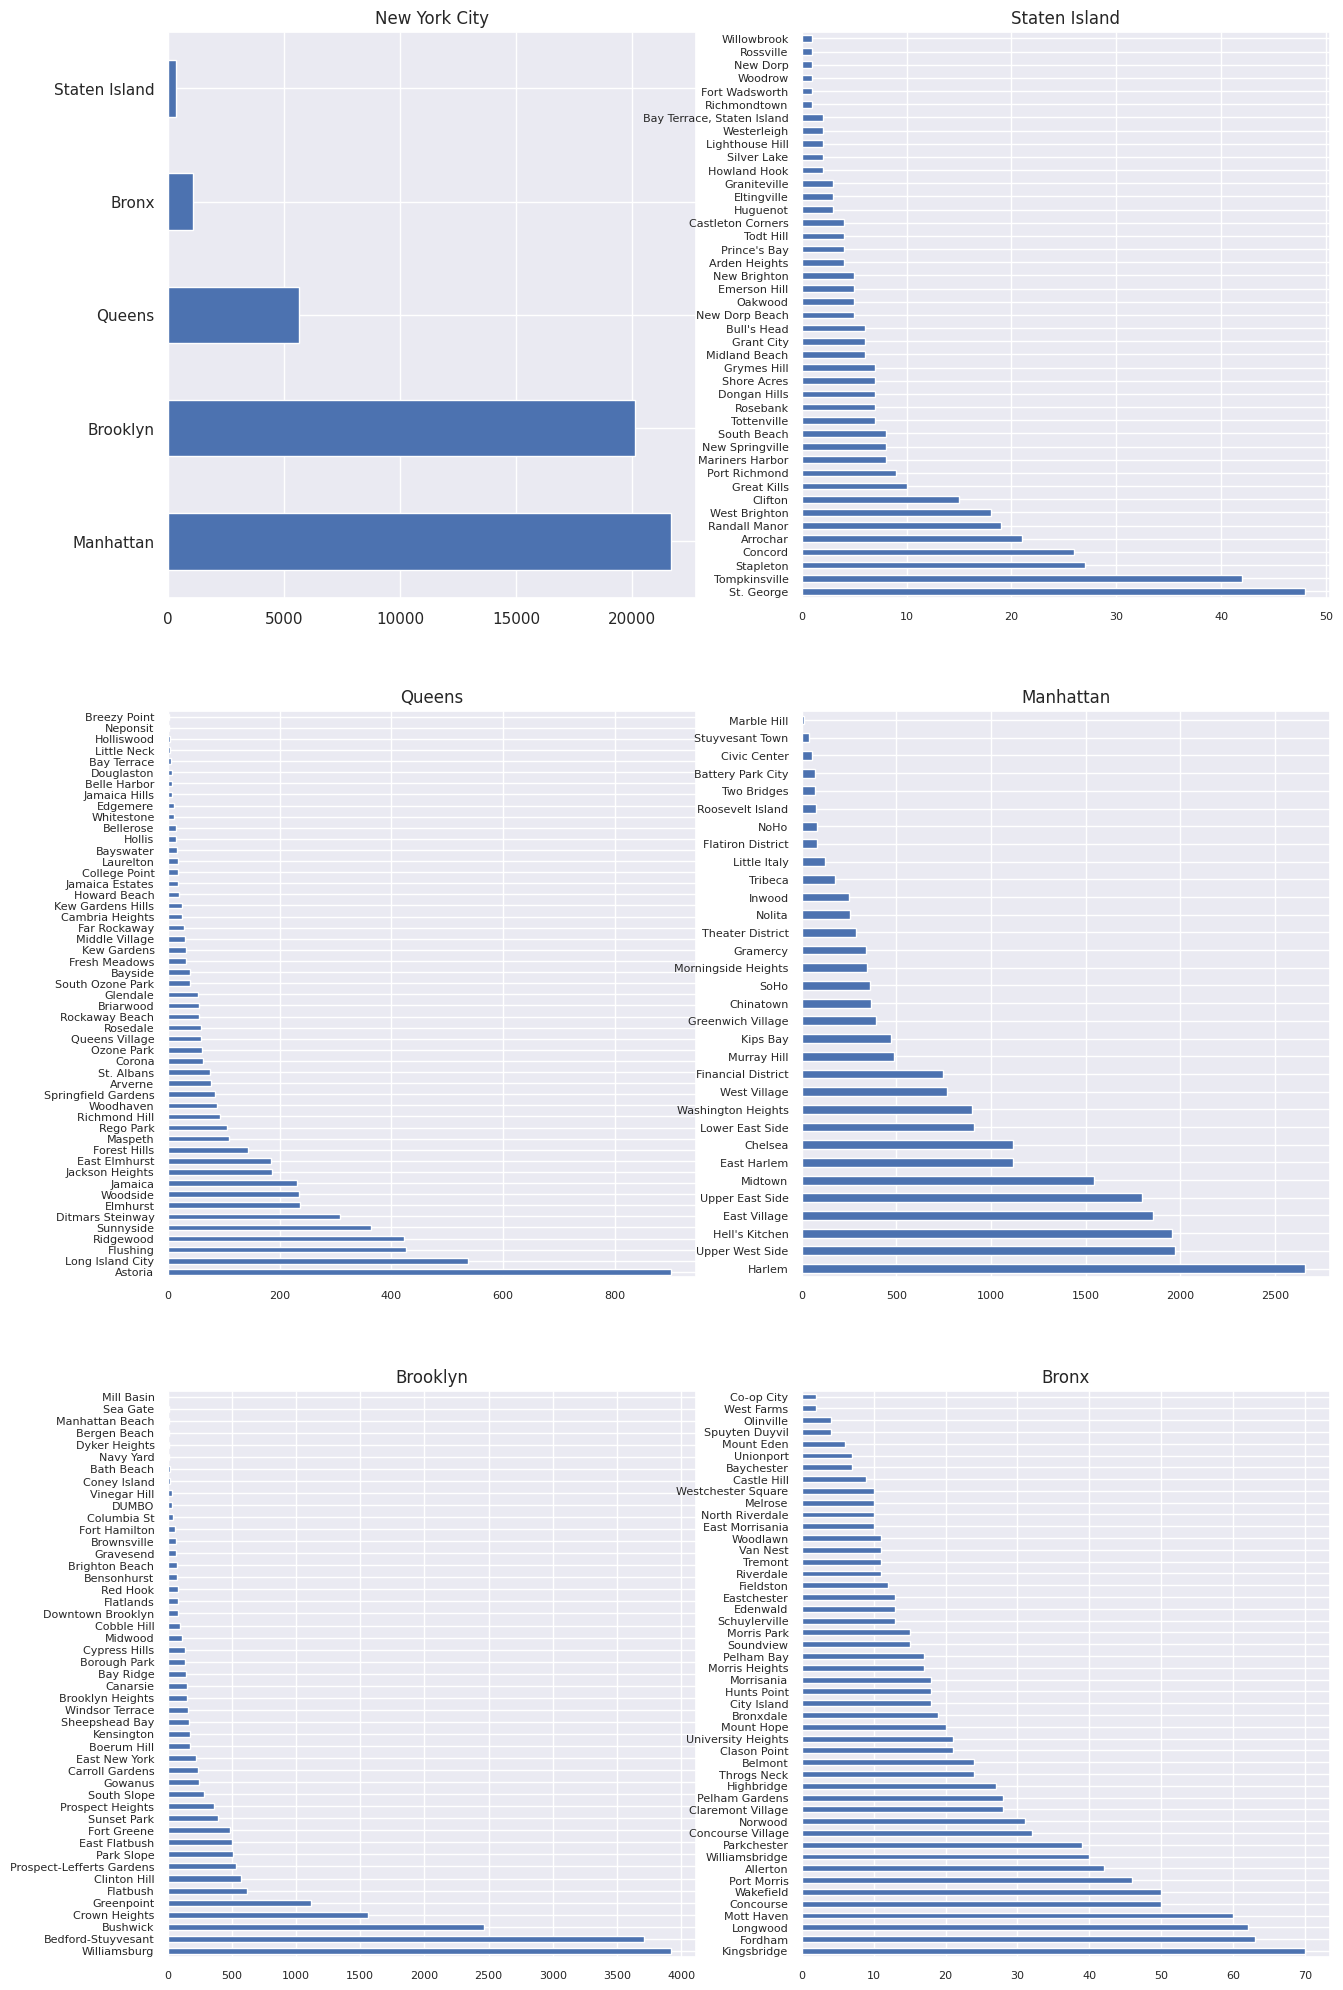

In [17]:
figure, axes = plt.subplots(3, 2, figsize=(15,25))

nyc_df['neighbourhood_group'].value_counts().plot.barh(ax = axes[0,0], title = 'New York City', ylabel = '' )
nyc_df[nyc_df.neighbourhood_group == 'Staten Island']['neighbourhood'].value_counts().plot.barh(ax = axes[0,1], title = 'Staten Island', ylabel = '', fontsize = 8 )
nyc_df[nyc_df.neighbourhood_group == 'Queens']['neighbourhood'].value_counts().plot.barh(ax = axes[1,0], title = 'Queens', ylabel = ''  , fontsize = 8)
nyc_df[nyc_df.neighbourhood_group == 'Manhattan']['neighbourhood'].value_counts().plot.barh(ax = axes[1,1], title = 'Manhattan', ylabel = '', fontsize = 8 )
nyc_df[nyc_df.neighbourhood_group == 'Brooklyn']['neighbourhood'].value_counts().plot.barh(ax = axes[2,0], title = 'Brooklyn', ylabel = '' , fontsize = 8)
nyc_df[nyc_df.neighbourhood_group == 'Bronx']['neighbourhood'].value_counts().plot.barh(ax = axes[2,1], title = 'Bronx', ylabel = '' , fontsize = 8)

